In [2]:
import os
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import math as m

Useful functions

- $\textit{plot_planck(T)}$: plots Planck function at temperature T


- $\textit{transmission_fn(Ts, Ls)}$: plots radiance transmission for some temperatures Ts/radiances Ls set. Takes "theoretical" radiance at the mean temperature of the "experimental" set

In [3]:
def read_prn(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    
    splits = [_]*5
    wns_and_temps = [_]*5
    
    for i in range(5):     #find lists of wavenumbers, and each of 4 temperature sets
        splits[i] = lines[i].split()
        wns_and_temps[i] = [float(splits[i][n]) for n in range(len(splits[i]))]
        
    return wns_and_temps

In [4]:
#wns_and_temps = read_prn('//icnas4.cc.ic.ac.uk/rs5115/downloads', '(2018_09_27_12_05_06_638)_Measurement_progression.prn')
wns_and_temps_first = read_prn('C:/Users/Rachel/OneDrive/Documents/MSci_Project', '(2018_09_27_12_40_54_386)_Measurement_progression.prn')
wns_and_temps_last = read_prn('C:/Users/Rachel/OneDrive/Documents/MSci_Project', '(2018_09_27_14_23_05_967)_Measurement_progression.prn')

def plot_temp_vs_wn(spectrum, lower_wn, upper_wn): 
    plt.plot(wns_and_temps_first[0][lower_wn:upper_wn],wns_and_temps_first[spectrum][lower_wn:upper_wn])
    plt.show()

plot_temp_vs_wn(spectrum=1, lower_wn=5, upper_wn=100) #spectrum takes values 1-4

In [5]:
h = 6.626e-34
c = 299792458
k = 1.381e-23

def planck(wavenumber, T):
    return 2*h*(c**2)*((wavenumber*100)**3)/(np.exp(h*c*(wavenumber*100)/(k*T))-1)

In [6]:
wns = np.array(wns_and_temps_first[0][860:4000])            #set of wavenumbers

temps_first = np.array(wns_and_temps_first[1][860:4000])    #definining temperatures (first set) for results 1
print(np.average(temps_first)-273.15)

temps_last = np.array(wns_and_temps_last[1][860:4000])      #defining temperatures for results 2
print(np.average(temps_last)-273.15)

planckvec = np.vectorize(planck)

21.763222643312133
60.865138216560524


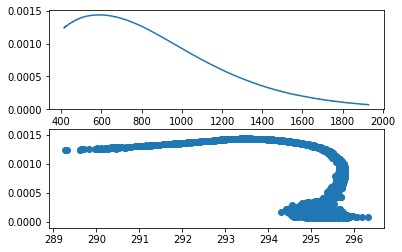

In [7]:
rad_first = planckvec(wns, temps_first) #radiances of first dataset

fig = plt.figure()   #plot radiance as function of wavenumber
plt.subplot(2,1,1)
plt.plot(wns, rad_first)

plt.subplot(2,1,2)
plt.scatter(temps_first,rad_first)
plt.ylim(-0.0001,0.0016)

plt.show()

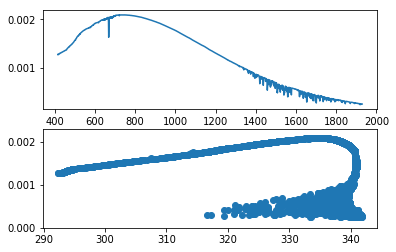

In [23]:
rad_last = planckvec(wns, temps_last)

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(wns, rad_last)

plt.subplot(2,1,2)
plt.scatter(temps_last,rad_last)
plt.ylim(0.,0.0023)

plt.show()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def plot_3d_fns_0(start, stop, azimuth=None, elevation=None): #start and stop is roughly the time in seconds
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(wns, rad_last, temps_last, cmap='inferno')


plot_deltas(0, wns[-1])

In [9]:
def plot_planck(temp):       #plot planck curve at some temperature
    wavenums = np.array(wns)
    radiances = []
    
    for w in wavenums:
        radiances.append(planck(w,temp))
    
    plt.plot(wavenums, radiances)
    plt.xlabel('wavenumber $cm^{-1}$')
    plt.ylabel('radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')

def plot_3d_fn(start, stop, azimuth=None, elevation=None): #start and stop is roughly the time in seconds
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(wns, temps_first, rad_first, cmap='inferno')
    ax.set_xlabel('Wavenumber')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Radiance')

plot_3d_fn(0, wns[-1])

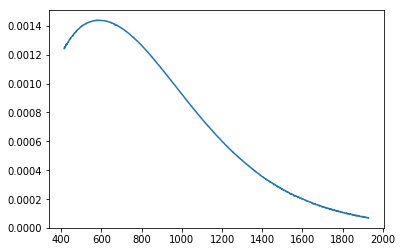

In [17]:
#plot_planck(np.average(temps_first))
plt.plot(wns, rad_first)
plt.show()

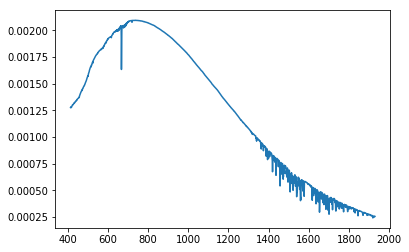

In [18]:
#plot_planck(np.average(temps_last))
plt.plot(wns, rad_last)
plt.show()

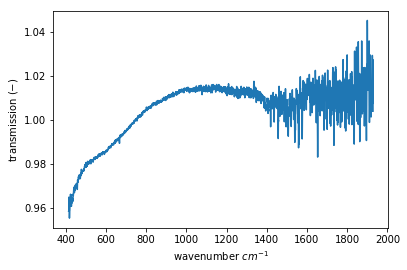

In [12]:
def transmission_fn(temp_set,rad_set):        #function plotting transmisson of radiance (real/theoretical radiance)
    wavenums = np.array(wns)
    real_radiances = rad_set
    theory_radiances = []
    temp_average = np.average(temp_set)

    for w in wavenums:
        theory_radiances.append(planck(w,temp_average))
    
    def division(real_val,theory_val):
        return real_val/theory_val
    
    division_vec = np.vectorize(division)
    
    ratio = division_vec(real_radiances, theory_radiances)
    plt.plot(wavenums, ratio)
    plt.xlabel('wavenumber $cm^{-1}$')
    plt.ylabel('transmission $(-)$')
    plt.show()
        
transmission_fn(temps_first,rad_first)

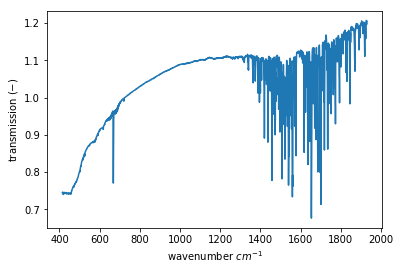

In [13]:
transmission_fn(temps_last, rad_last)